# Text prcessing using python

In [1]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U spacy-Lookups-data

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [4]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
data=pd.read_csv("D:\\lab\\NLP\\twitter16m.csv", encoding='latin1', header=None)

In [6]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
data = data[[5, 0]]

In [8]:
data.columns=['twitts','sentiment']
data.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [9]:
data['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [10]:
sent_map = {0: "negative", 4: "poisitive"}

# Word Count

In [11]:
data['word_counts'] = data['twitts'].apply(lambda x: len(str(x).split()))
data.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# character counts

In [12]:
data['char_counts']=data['twitts'].apply(lambda x: len(str(x).split()))
data.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,19
1,is upset that he can't update his Facebook by ...,0,21,21
2,@Kenichan I dived many times for the ball. Man...,0,18,18
3,my whole body feels itchy and like its on fire,0,10,10
4,"@nationwideclass no, it's not behaving at all....",0,21,21


# Average Word Length

In [13]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) #len(x)/len(words)    

In [14]:
data['avg_word_len']=data['twitts'].apply(lambda x: get_avg_word_len(x))
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,19,5.052632
1,is upset that he can't update his Facebook by ...,0,21,21,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,18,3.944444
3,my whole body feels itchy and like its on fire,0,10,10,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,21,4.285714


# stops words count

In [15]:
print(STOP_WORDS)

{'am', 'less', 'his', 'whence', 'sometime', 'thereafter', 'almost', 'although', 'hereby', 'meanwhile', 'i', 'anything', 'in', 'since', 'already', 'anywhere', 'say', 'towards', 'seeming', 'thus', "'s", 'further', 'see', 'somewhere', 'wherein', 'fifteen', 'something', 'cannot', 'sometimes', 'enough', '‘d', 'thence', 'beforehand', 'become', 'every', 'yet', 'there', 'no', 'last', 'first', 'out', 'that', 'these', 'not', 'she', 'should', 'be', 'elsewhere', 'unless', 'amongst', '‘re', 'nine', 'however', '‘ll', 'anyhow', 'them', 'does', 'n’t', 'would', 'noone', 'along', 'been', 'whether', 'six', "'d", 'nevertheless', 'twenty', 'together', 'get', 'quite', 'used', 'above', 'either', 'below', 'least', '’ve', 'those', 'whereby', 'put', 'can', '’s', 'except', 'only', 'becoming', 'most', 'between', 'or', 'are', 'too', 'about', 'its', 'had', 'when', 'we', 'hereafter', 'former', 'her', 'both', 'whatever', 'whoever', 'whereas', 'alone', 'ever', 'seemed', 'whereupon', 'much', 'besides', 'call', '’m', 't

In [16]:
data['stop_words_count']=data['twitts'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,19,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,21,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,18,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,10,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,21,4.285714,10


In [17]:
#stop words count
#x="this is text data"
#y=x.split

In [18]:
#for t in y:
     #if t in STOP_WORDS:
       #print(t)

# count  # (hashtags) and @ (mentions)

In [19]:
x = "this is a # hashtag and this is @ mentions"

In [20]:
for t in x.split():
    if t.startswith("#"):
        print(t)

#


In [21]:
data['count_hashtags'] = data['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))

In [22]:
data['count_mentions'] = data['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [23]:
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,19,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,21,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,18,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,10,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,21,4.285714,10,0,1


# if numeric digits are presents in twitts

In [24]:
data['numeric_count']=data['twitts'].apply(lambda x:len([t for t in x.split() if t .isdigit()]))
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,19,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,21,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,18,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,10,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,21,4.285714,10,0,1,0


# UPPER case words count

In [25]:
data['count_hashtags'] = data['twitts'].apply(lambda x:len([t for t in x.split() if t.isupper() and len(x)>3]))
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,19,5.052632,4,1,1,0
1,is upset that he can't update his Facebook by ...,0,21,21,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,18,3.944444,7,1,1,0
3,my whole body feels itchy and like its on fire,0,10,10,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,21,4.285714,10,1,1,0


In [26]:
data.iloc[75]['twitts']

'No picnic  my phone smells like citrus.'

# preprocessing and cleaning

# lower case conversation

In [27]:
data['twitts'] = data['twitts'].apply(lambda x: x.lower())
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,19,5.052632,4,1,1,0
1,is upset that he can't update his facebook by ...,0,21,21,4.285714,9,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,18,3.944444,7,1,1,0
3,my whole body feels itchy and like its on fire,0,10,10,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,21,4.285714,10,1,1,0


In [28]:
data.iloc[75]['twitts']

'no picnic  my phone smells like citrus.'

#  contraction and expansion

In [29]:
x="i don't know what you want,can't, he'll, id"

In [30]:
 contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
 "he'd've": "he would have",
"he'11": "he will",
"he'11've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'11": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'l1": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'11've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'11": "she will",
"she'll've" : "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
 "so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'11": "they will",
"they'11've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u " : " you ",
" ur " : " your ",
" n " : " and "}     

In [31]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x   
    else:
        return x

In [32]:
x = "hi, i'd be happy"

In [33]:
cont_to_exp(x)

'hi, i would be happy'

# Time taken to execute

In [34]:
%%time
data['twitts']=data['twitts'].apply(lambda x:cont_to_exp(x))

Wall time: 24.8 s


# count and remove e-mails
#getting all the emails using regular expression(re)

In [35]:
import re

In [36]:
y = 'hi my email me at email@email.com'

In [37]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',y)

['email@email.com']

In [38]:
data['emails'] = data['twitts'].apply(lambda y: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',y))

In [39]:
data['email_counts']=data['emails'].apply(lambda y: len(y))

In [40]:
data[data['email_counts']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,20,4.150000,6,4,0,0,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,3,9.000000,1,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,20,5.500000,11,0,1,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,8,8.500000,0,0,1,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,21,5.428571,7,0,1,1,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,21,5.047619,10,1,1,0,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,15,5.533333,4,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,14,5.785714,6,1,1,0,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,9,7.111111,2,0,1,0,[jill@q985fm.com],1


In [41]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', '', y)

'hi my email me at '

In [42]:
data['twitts'] = data['twitts'].apply(lambda y: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','',y))

In [43]:
data[data['email_counts']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,20,4.150000,6,4,0,0,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,3,9.000000,1,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,20,5.500000,11,0,1,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,8,8.500000,0,0,1,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,21,5.428571,7,0,1,1,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,21,5.047619,10,1,1,0,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,15,5.533333,4,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, is a good start. but i thin...",4,14,14,5.785714,6,1,1,0,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,9,7.111111,2,0,1,0,[jill@q985fm.com],1


# count and remove URL's

In [44]:
z = 'hi my watch me at https://www.youtube.com/watch?v=UwsrzCVZAb8&list'

In [45]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',z)


[('https', 'www.youtube.com', '/watch?v=UwsrzCVZAb8&list')]

In [46]:
data["urls_flag"] = data['twitts'].apply(lambda z:len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',z)))
 

In [47]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', "",z)


'hi my watch me at '

In [48]:
data['twitts'] = data["twitts"].apply(lambda z: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', "",z)
)

In [49]:
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,19,5.052632,4,1,1,0,[],0,1
1,is upset that he cannot update his facebook by...,0,21,21,4.285714,9,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,18,3.944444,7,1,1,0,[],0,0
3,my whole body feels itchy and like its on fire,0,10,10,3.700000,5,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,21,4.285714,10,1,1,0,[],0,0


In [50]:
data.loc[0]["twitts"]

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

# Remove retweets(RT)

In [51]:
data["twitts"] = data["twitts"].apply(lambda z:re.sub("RT","",z))

In [52]:
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,19,5.052632,4,1,1,0,[],0,1
1,is upset that he cannot update his facebook by...,0,21,21,4.285714,9,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,18,3.944444,7,1,1,0,[],0,0
3,my whole body feels itchy and like its on fire,0,10,10,3.700000,5,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,21,4.285714,10,1,1,0,[],0,0


# Remove special characters and punctuation

In [53]:
data["twitts"] = data["twitts"].apply(lambda z: re.sub("[^A-Za-z0-9-]+", "",z
))

# Remove multiple spaces

In [54]:
m = "hii   how   are   you"

In [55]:
" ".join(m.split())

'hii how are you'

In [56]:
data["twitts"] = data["twitts"].apply(lambda m: " ".join(m.split()))

# Remove html tags

In [57]:
from bs4 import BeautifulSoup

In [58]:
h = '<html><h2>Thank you very much</h2></html>'

In [59]:
BeautifulSoup(h, 'lxml').get_text()

'Thank you very much'

# remove accented chars

In [60]:
import unicodedata

In [61]:
a = 'Accented text'

In [62]:
def remove_accented_chars(s):
    a = unicodedata.normalize('NFKD', a).encode('ascii', 'ignore').decode('utf-8','ignore')

In [63]:
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts,urls_flag
0,switchfoot-awwwthatisabummeryoushouldagotdavid...,0,19,19,5.052632,4,1,1,0,[],0,1
1,isupsetthathecannotupdatehisfacebookbytextingi...,0,21,21,4.285714,9,0,0,0,[],0,0
2,kenichanidivedmanytimesfortheballmanagedtosave...,0,18,18,3.944444,7,1,1,0,[],0,0
3,mywholebodyfeelsitchyandlikeitsonfire,0,10,10,3.700000,5,0,0,0,[],0,0
4,nationwideclassnoitisnotbehavingatalliammadwhy...,0,21,21,4.285714,10,1,1,0,[],0,0


# Spacy and NLP

# remove stopwords

In [64]:
import spacy

In [65]:
x = ' Examples of a few stop words in English are the a an so what'

In [66]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'Examples stop words English'

In [67]:
data['twitts'] = data['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [68]:
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts,urls_flag
0,switchfoot-awwwthatisabummeryoushouldagotdavid...,0,19,19,5.052632,4,1,1,0,[],0,1
1,isupsetthathecannotupdatehisfacebookbytextingi...,0,21,21,4.285714,9,0,0,0,[],0,0
2,kenichanidivedmanytimesfortheballmanagedtosave...,0,18,18,3.944444,7,1,1,0,[],0,0
3,mywholebodyfeelsitchyandlikeitsonfire,0,10,10,3.700000,5,0,0,0,[],0,0
4,nationwideclassnoitisnotbehavingatalliammadwhy...,0,21,21,4.285714,10,1,1,0,[],0,0


# convert into base or root of word

In [69]:
!pip3 install en_core_web_sm


In [70]:
nlp = spacy.load('en_core_web_sm')

In [71]:
l = "kenichan i dived many times for managing the ball"
#example for lemmatize:- dived =dive, times = time, managed = manage

In [72]:
def make_to_base(l):
    l_list =[]
    doc = nlp(l)
    
    for token in doc:
        lemma = str(token.lemma_)
        
        l_list.append(lemma)
    print(" ".join(l_list))    

In [73]:
make_to_base(l)

kenichan I dive many time for manage the ball


# remove common and rare words

In [74]:
" ".join(data.head()['twitts'])

'switchfoot-awwwthatisabummeryoushouldagotdavidcarrofthirddaytodoitd isupsetthathecannotupdatehisfacebookbytextingitandmightcryasaresultschooltodayalsoblah kenichanidivedmanytimesfortheballmanagedtosave50therestgooutofbounds mywholebodyfeelsitchyandlikeitsonfire nationwideclassnoitisnotbehavingatalliammadwhyamiherebecauseicannotseeyoualloverthere'

In [75]:
text = " ".join(data['twitts']) 

In [76]:
text = text.split()

In [77]:
freq_comm = pd.Series(text).value_counts()
freq_comm

goodmorning                                                                                                       564
headache                                                                                                          299
goodnight                                                                                                         265
happymothersday                                                                                                   238
mytummyhurts                                                                                                      212
                                                                                                                 ... 
willposttobnforum2things1iamexcitedthatt-shirtsmayarriveintimefordcamp2myabsolutedelightwampgratitudetowardlro      1
ilovecoffeesumatra                                                                                                  1
victoriastilesawcrap-itriedtovoteforyoubutyouhavetobeaus

In [78]:
freq20 = freq_comm[:20]

In [79]:
freq20

goodmorning                                                                  564
headache                                                                     299
goodnight                                                                    265
happymothersday                                                              238
mytummyhurts                                                                 212
isplayerhasdiedsorry                                                         210
atwork                                                                       187
goodmorningeveryone                                                          157
myheadhurts                                                                  130
homework                                                                     124
ihaveaheadache                                                               122
offtowork                                                                    121
backtowork                  

In [80]:
data['twitts'] = data['twitts'].apply(lambda x:" ".join([t for t in x.split() if t not in freq20]))

In [81]:
rare20= freq_comm[-20:]

In [82]:
rare20

todayisthedayihavebeenwaitingfor                                                                                  1
gotenks0283iwillillseeyousoonnucleusnutrientslovenicole                                                           1
dizzydaisy2393ohnothatisawful-dentistsaretheworstiamsosorry                                                       1
fmlmyflighttobloomingtonjustlandedinindianapolishahasomuchforokflyingweather                                      1
charlottedoylestuckindoingphysicschemistrybusinessstudiesandmymediamoviesweet                                     1
doingmyenglishessayonrampjwtfthatishouldhavedonealongtimeagowhenitwasassignedlastthursday                         1
jessereedpsyourworksucks                                                                                          1
whereismyvacuumfromellen                                                                                          1
heyhavenotheardfromyoueither                                            

In [83]:
data['twitts'] = data['twitts'].apply(lambda x: " ".join(t for t in x.split() if t not in rare20))

In [84]:
data.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts,urls_flag
0,switchfoot-awwwthatisabummeryoushouldagotdavid...,0,19,19,5.052632,4,1,1,0,[],0,1
1,isupsetthathecannotupdatehisfacebookbytextingi...,0,21,21,4.285714,9,0,0,0,[],0,0
2,kenichanidivedmanytimesfortheballmanagedtosave...,0,18,18,3.944444,7,1,1,0,[],0,0
3,mywholebodyfeelsitchyandlikeitsonfire,0,10,10,3.700000,5,0,0,0,[],0,0
4,nationwideclassnoitisnotbehavingatalliammadwhy...,0,21,21,4.285714,10,1,1,0,[],0,0


# Word cloud visualisation

In [85]:
!pip install wordcloud

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
w = ' '.join(text[:20000])

In [88]:
len(text)

1599857

<function matplotlib.pyplot.show(close=None, block=None)>

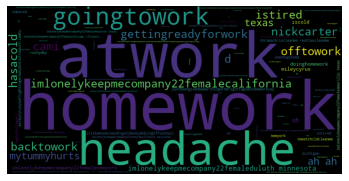

In [89]:
wc = WordCloud(width = 800, height = 400).generate(w)
plt.imshow(wc)
plt.axis('off')
plt.show

# spelling correction

In [90]:
!pip install -U textblob
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [91]:
from textblob import TextBlob

In [92]:
s = 'thic is goog bouk'

In [93]:
s = TextBlob(s).correct()
s

TextBlob("this is good book")

# Tokenization

In [94]:
t = 'That was an extraordiary, movie'

In [95]:
TextBlob(t).words

WordList(['That', 'was', 'an', 'extraordiary', 'movie'])

In [96]:
doc = nlp(t)
for token in doc:
    print(token)

That
was
an
extraordiary
,
movie


# Lemmatization

In [97]:
lm = 'runs run running ran'

In [98]:
from textblob import Word

In [99]:
for token in lm.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [100]:
doc = nlp(lm)
for token in doc:
    print(token.lemma_)

run
run
run
run


# Detect Entities using NER of SpaCy

Named Entity Recognition (NER) is a standard NLP problem which involves spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories.

In [101]:
x = "We Are Living Through A Global Mental Health Crisis: UN Chief"

In [102]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + str(spacy.explain(ent.label_)))

UN - ORGCompanies, agencies, institutions, etc.


In [103]:
from spacy import displacy

In [104]:
displacy.render(doc, style = 'ent')

# Detecting Nouns

In [105]:
x

'We Are Living Through A Global Mental Health Crisis: UN Chief'

In [106]:
for noun in doc.noun_chunks:
    print(noun)

We
A Global Mental Health Crisis
UN Chief


# Translation and language Detection

In [107]:
x

'We Are Living Through A Global Mental Health Crisis: UN Chief'

In [108]:
tb = TextBlob(x)

In [110]:
#tb.detect_language()

In [111]:
'en'

'en'

In [113]:
#tb.translate(to='kn')

# Use inbuilt sentiment classifier
TextBlob library also comes with a NaiveBayesAnalyzer, Naive Bayes is a commonly used machine learning text-classification algorithm.



In [114]:
from textblob.sentiments import NaiveBayesAnalyzer

In [115]:
x = "Boris Johnson Meets Ukraine's Volodymyr Zelensky In Surprise Kyiv Visit"

In [116]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [117]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8868042579447395, p_neg=0.11319574205526026)

# Advanced Text Processing
# N-Grams

In [118]:
y = "Bangalore is silicon city"

In [119]:
tb = TextBlob(y)

In [120]:
tb.ngrams(4)

[WordList(['Bangalore', 'is', 'silicon', 'city'])]

# Bag of words

In [121]:
x = ['this is first sentence this is', 'this is second', 'this is last']

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [124]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [125]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [126]:
BOW = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [127]:
BOW

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [128]:
x

['this is first sentence this is', 'this is second', 'this is last']

# Term Frequency
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).



In [129]:
BOW.shape

(3, 6)

In [133]:
tf = BOW/BOW.shape[1]

In [137]:
for index, row in enumerate(BOW.iterrows()):
    for col in row[1].index:
        BOW.loc[index, col] = BOW.loc[index, col]/sum(row[1].values)
    

In [138]:
BOW

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


# Inverse Document Frequency(IDF)
how commonly a word is used. The more frequent its usage across documents, the lower its score. The lower the score, the less important the word becomes
idf = log(1+N)/(n+1)+1 used in sklearn when smooth_idf = True

In [156]:
import numpy as np

In [157]:
x_df = pd.DataFrame(x, columns=['words'])

In [158]:
x_df

,words
0,this is first sentence this is
1,this is second
2,this is last


In [142]:
N = BOW.shape[0]
N

3

In [143]:
bb = BOW.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [144]:
bb['is'].sum()

3

In [145]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [146]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [147]:
nz

[1, 3, 1, 1, 1, 3]

In [149]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)    

In [150]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [151]:
BOW

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


# Term Frequency Inverse Document Frequency(TFIDF)

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [172]:
tfidf = TfidfVectorizer()
x_tfidf =tfidf.fit_transform(x_df['words'])

In [173]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [174]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [175]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

# Word Embeddings
Spacy 'Word2Vec'

In [176]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2022-06-18 18:31:04.464504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-18 18:31:04.464545: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [177]:
nlp = spacy.load('en_core_web_lg')

In [180]:
doc = nlp("Burj khaifa! is tallest tppr")

In [182]:
for token in doc:
    print(token.text, token.has_vector)

Burj True
khaifa False
! True
is True
tallest True
tppr False


In [183]:
token.vector.shape

(300,)

In [185]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()    

Burj Burj 1.0
Burj khaifa 0.0
Burj ! -0.0602872334420681
Burj is -0.06578993052244186
Burj tallest 0.33735355734825134
Burj tppr 0.0

khaifa Burj 0.0
khaifa khaifa 1.0
khaifa ! 0.0
khaifa is 0.0
khaifa tallest 0.0
khaifa tppr 0.0

! Burj -0.0602872334420681
! khaifa 0.0
! ! 1.0
! is 0.3155940771102905
! tallest 0.01071207132190466
! tppr 0.0

is Burj -0.06578993052244186
is khaifa 0.0
is ! 0.3155940771102905
is is 1.0
is tallest 0.20017458498477936
is tppr 0.0

tallest Burj 0.33735355734825134
tallest khaifa 0.0
tallest ! 0.01071207132190466
tallest is 0.20017458498477936
tallest tallest 1.0
tallest tppr 0.0

tppr Burj 0.0
tppr khaifa 0.0
tppr ! 0.0
tppr is 0.0
tppr tallest 0.0
tppr tppr 1.0



<ipython-input-185-46876ab0f5c1>:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token1.text, token2.text, token1.similarity(token2))


# Machine Learning Models for Text Classification

#BOW

In [186]:
data.shape

(1600000, 12)

In [188]:
# sampling the number of rows
data0 = data[data['sentiment']==0].sample(2000)
data4 = data[data['sentiment']==4].sample(2000)

In [198]:
sdata = data0.append(data4)
sdata

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,emails,email_counts,urls_flag
689067,kiajdiwasabouttosaysomethingaboutyourattemptto...,0,26,26,3.653846,17,1,1,0,[],0,0
472909,onmywayintoworkweekendsneedtobelonger,0,11,11,3.454545,5,0,0,0,[],0,0
244865,palmbeachlocatryeaiamgettingthatcraptoosamepic...,0,12,12,5.833333,2,0,1,0,[],0,0
395579,wishingicouldtalktoacertainpersonbutsomehowfee...,0,15,15,4.333333,6,1,0,0,[],0,0
196827,iamsobored,0,4,4,2.750000,2,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1556827,ifeelverycreativelyfunnytodaynotusetothis,4,10,10,4.100000,4,1,0,0,[],0,0
1362441,andonthatnoteheisnotitheyarenotme,4,13,13,2.923077,6,1,0,0,[],0,0
1515533,fcutittaifiknewwhatthatreallymeantimightbeable...,4,14,14,3.857143,8,1,1,0,[],0,0
1187158,youngsoulrebelthatentirewebsiteisscarysoidonot...,4,16,16,4.875000,4,1,1,0,[],0,0


In [230]:
#removing the twitts,sentiment and emails columns (creating manual features)
sdata_feat = sdata.drop(labels=['twitts','sentiment','emails'], axis = 1).reset_index(drop=True)
sdata_feat

,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,email_counts,urls_flag
0,26,26,3.653846,17,1,1,0,0,0
1,11,11,3.454545,5,0,0,0,0,0
2,12,12,5.833333,2,0,1,0,0,0
3,15,15,4.333333,6,1,0,0,0,0
4,4,4,2.750000,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3995,10,10,4.100000,4,1,0,0,0,0
3996,13,13,2.923077,6,1,0,0,0,0
3997,14,14,3.857143,8,1,1,0,0,0
3998,16,16,4.875000,4,1,1,0,0,0


In [200]:
#target variable
y = sdata['sentiment']

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

In [204]:
cv = CountVectorizer()
text_counts = cv.fit_transform(sdata['twitts'])

In [207]:
text_counts.toarray().shape

(4000, 4297)

In [217]:
sdata_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [218]:
sdata_bog

,09,091509notmyb,0nosleeptonightgreat,0ouchijustbitmytoungehahaha,100cpuofparallelsapponthehostbut0inthelinuxguestcouldbeupdatedbcronjobspideringthemountedmacosfilesystem,1030thenidkwhatpartyingshoislol,10minutewarningthe6amstarthasjustkickedinsomustbeoffshortlylovetoallknowingnodstosomex,10pm,10years,10yrsagoonanightlikethisidhavebeendrinkingwithcoworkersthenwenthomegotcleanedupandwentclubbing,...,yusrijayithinktonightiamjustgonnarelax2sambiltengokoctoberroadsampaihabis2ndseason,yvetteseriouslyjustsaidiwilltakecumoverthatshitanytimequotandiagreeyummyumm,za,zaccolbyladiesandgents,zaragreenyeahsheneedstoconvinceherselfsheisworthitfirstandsheis,zend13ifitdoesnotletmemakeameaslylittlepsnaccountthenidonotcaremuch,zettydespairafterusingmintfor2daysiremoveditintheprocessofincludingthosebellsampwhistlestheymadeitveryunstable,zimmermanemiamstillatwork,zingdaygladwetookthatwrongturnandjustendedupthere,zitashotoutfitkindalikewhatiamwearinginmyfirstslthe2nddoesnothavethedressorbootsyet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning Algorithms

In [219]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [220]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [221]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}

In [222]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [223]:
#here, we are training our model by defining the function classify.

def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [224]:
%%time
classify(sdata_bow,y)

SGD  --->  0.5
LGR  --->  0.50125
LGR-CV  --->  0.50125
SVM  --->  0.50125
RFC  --->  0.50125
Wall time: 1min 6s


# manual Feature

In [226]:
#passing all the manual features
sdata_feat

,word_counts,char_counts,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,email_counts,urls_flag
689067,26,26,3.653846,17,1,1,0,0,0
472909,11,11,3.454545,5,0,0,0,0,0
244865,12,12,5.833333,2,0,1,0,0,0
395579,15,15,4.333333,6,1,0,0,0,0
196827,4,4,2.750000,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1556827,10,10,4.100000,4,1,0,0,0,0
1362441,13,13,2.923077,6,1,0,0,0,0
1515533,14,14,3.857143,8,1,1,0,0,0
1187158,16,16,4.875000,4,1,1,0,0,0


In [227]:
%%time
classify(sdata_feat, y)

SGD  --->  0.5975
LGR  --->  0.61125
LGR-CV  --->  0.6075
SVM  --->  0.6075
RFC  --->  0.55625
Wall time: 649 ms


# Manual + BOW

In [231]:
#passing all the manual features along with bag of words features.

X = sdata_feat.join(sdata_bow)

In [232]:
%%time
classify(X, y)

SGD  --->  0.6025
LGR  --->  0.61125
LGR-CV  --->  0.60875
SVM  --->  0.6125
RFC  --->  0.59375
Wall time: 19.7 s


# TFIDF

In [233]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(sdata['twitts'])

In [234]:
%%time
classify(pd.DataFrame(X.toarray()), y)

SGD  --->  0.5
LGR  --->  0.50125
LGR-CV  --->  0.50125
SVM  --->  0.50125
RFC  --->  0.50125
Wall time: 1min 1s


# Word2Vec

In [235]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [236]:
%%time
sdata['vec'] = sdata['twitts'].apply(lambda x: get_vec(x))

Wall time: 16.2 s


In [239]:
X = np.concatenate(sdata['vec'].to_numpy(), axis=0)
X.shape

(4000, 300)

In [241]:
classify(pd.DataFrame(X), y)

SGD  --->  0.5
LGR  --->  0.49875
LGR-CV  --->  0.49875


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM  --->  0.50125
RFC  --->  0.5


In [242]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "-->", y_pred)

In [243]:
predict_w2v("This, was an last part of the project")

SGD --> [0]
LGR --> [0]
LGR-CV --> [0]
SVM --> [0]
RFC --> [0]


#For above sentence all algorithm predicted that sentence is not positive


In [250]:
predict_w2v('congratulation looking good')

SGD --> [4]
LGR --> [4]
LGR-CV --> [4]
SVM --> [4]
RFC --> [0]


#algorithm predicts the sentence as positive